In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

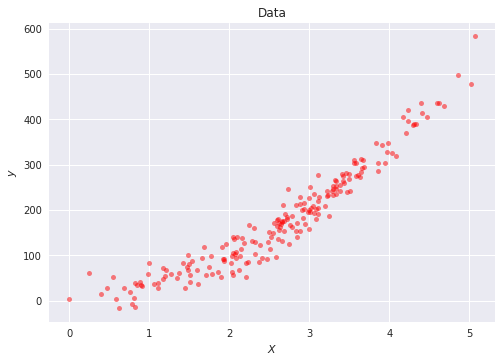

In [3]:
n = 200
X = np.random.normal(20,size=n)
X -= np.min(X)
y = (20*X**2) + (0.5*X) + (20 + np.random.normal(scale=25,size=n))

sort_ind = np.argsort(X)
X = X[sort_ind]
y = y[sort_ind]

fig, ax = plt.subplots()
ax.plot(X,y,'r.', markersize=10,alpha=0.5)
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$y$')
ax.set_title('Data')
plt.show()

In [4]:
pred_X = np.arange(-1, 7).reshape(-1,1)

In [5]:
#Basic Fit
X_1 = np.c_[ np.ones(X.shape[0]), X]
w_1, r_1, _, _ = np.linalg.lstsq(X_1, y)
w_1 = w_1.reshape(-1,1)

#Make prediction
pred_X1 = np.c_[ np.ones(pred_X.shape[0]), pred_X]
pred_1 = (w_1.T * pred_X1).sum(axis=1)

/home/jerry/.pyenv/versions/3.7.0/envs/scwg_ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#Quadratic Fit
X_2 = np.c_[np.ones(X.shape[0]), X, X**2]
w_2,r_2,_,_ = np.linalg.lstsq(X_2,y)
w_2 = w_2.reshape(-1,1)

pred_X2 = np.c_[ np.ones(pred_X.shape[0]), pred_X, pred_X**2]
pred_2 = (w_2.T * pred_X2).sum(axis=1)

/home/jerry/.pyenv/versions/3.7.0/envs/scwg_ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Super polynomial fit
X_3 = np.c_[np.ones(X.shape[0]), X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10,
           X**11, X**12, X**13, X**14]
w_3,r_3,_,_ = np.linalg.lstsq(X_3,y)
w_3 = w_3.reshape(-1,1)

pred_X3 = np.c_[np.ones(pred_X.shape[0]), pred_X, pred_X**2, pred_X**3, pred_X**4, pred_X**5,
            pred_X**6, pred_X**7, pred_X**8, pred_X**9, pred_X**10,
            pred_X**11, pred_X**12, pred_X**13, pred_X**14]
pred_3 = (w_3.T * pred_X3).sum(axis=1)

/home/jerry/.pyenv/versions/3.7.0/envs/scwg_ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


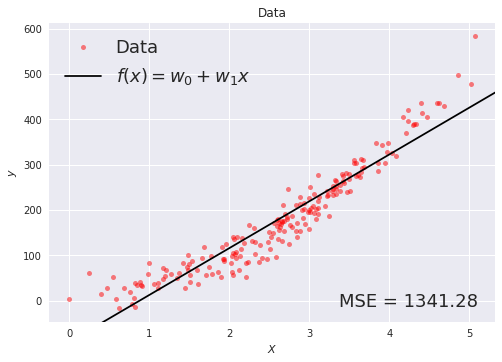

In [12]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(pred_X,pred_1,'k',label=r'$f(x) = w_0 + w_1x$')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(r_1[0]/n),transform=ax_1.transAxes,fontsize=18)
ax_1.legend(fontsize=18)

ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
plt.savefig('../figures/high_bias_fit.png')
plt.show()

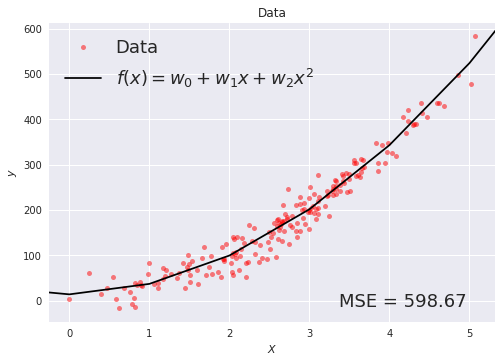

In [13]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(pred_X,pred_2,'k',label=r'$f(x) = w_0 + w_1x + w_2x^2$')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(r_2[0]/n),transform=ax_1.transAxes,fontsize=18)

ax_1.legend(fontsize=18)
ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
plt.savefig('../figures/best_fit.png')
plt.show()

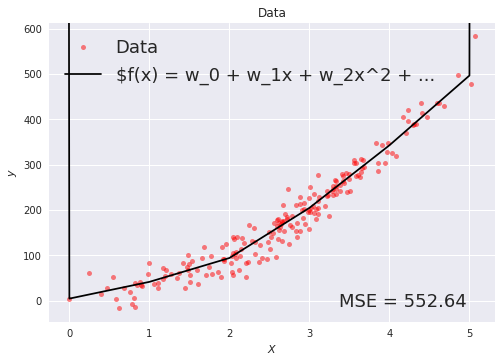

In [14]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(pred_X,pred_3,'k',label=r'$f(x) = w_0 + w_1x + w_2x^2 + ...')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(r_3[0]/n),transform=ax_1.transAxes,fontsize=18)

ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
ax_1.legend(fontsize=18)
plt.savefig('../figures//high_variance_fit.png')
plt.show()

Make new data to show overfitting behaviour

In [16]:
nn = 400
nX = np.random.normal(20,size=nn).reshape(-1,1)
nX -= np.min(nX)
ny = (20*nX**2) + (0.5*nX) + (20 + np.random.normal(scale=25,size=nn)).reshape(-1,1)

In [17]:
#High bias fit
nX1 = np.c_[ np.ones(nX.shape), nX]
prednX1 = (w_1.T * nX1).sum(axis=1,keepdims=True)
mse1 = (1/(2*nn)) * (ny - prednX1).T @ (ny - prednX1)

In [18]:
#Good fit
nX2 = np.c_[ np.ones(nX.shape), nX, nX**2]
prednX2 = (w_2.T * nX2).sum(axis=1,keepdims=True)
mse2 = (1/(2*nn)) * (ny - prednX2).T @ (ny - prednX2)

In [19]:
#High variance fit
nX3 = np.c_[ np.ones(nX.shape), nX, nX**2, nX**3, nX**4, nX**5, nX**6, nX**7,
           nX**8,nX**9,nX**10,nX**11,nX**12,nX**13,nX**14]
prednX3 = (w_3.T * nX3).sum(axis=1,keepdims=True)
mse3 = (1/(2*nn)) * (ny - prednX3).T @ (ny - prednX3)

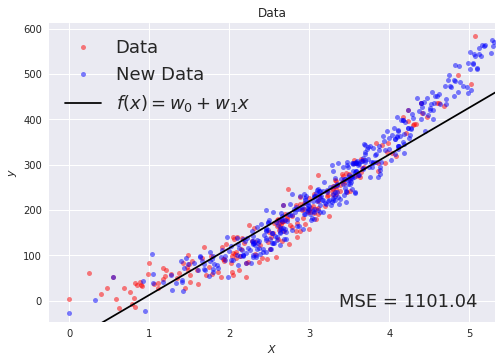

In [20]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(nX,ny,'b.',markersize=10,alpha=0.5,label='New Data')
ax_1.plot(pred_X,pred_1,'k',label=r'$f(x) = w_0 + w_1x$')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(mse1[0][0]),transform=ax_1.transAxes,fontsize=18)
ax_1.legend(fontsize=18)

ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
plt.savefig('../figures/high_bias_fit_new.png')
plt.show()

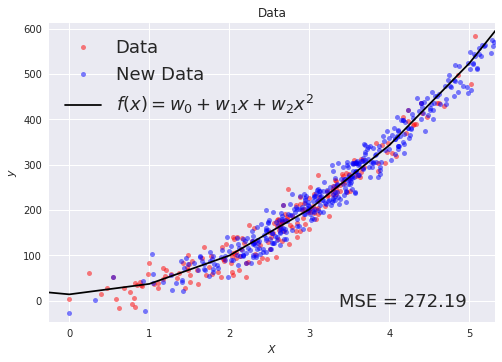

In [21]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(nX,ny,'b.',markersize=10,alpha=0.5,label='New Data')
ax_1.plot(pred_X,pred_2,'k',label=r'$f(x) = w_0 + w_1x + w_2x^2$')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(mse2[0][0]),transform=ax_1.transAxes,fontsize=18)

ax_1.legend(fontsize=18)
ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
plt.savefig('../figures/best_fit_new.png')
plt.show()

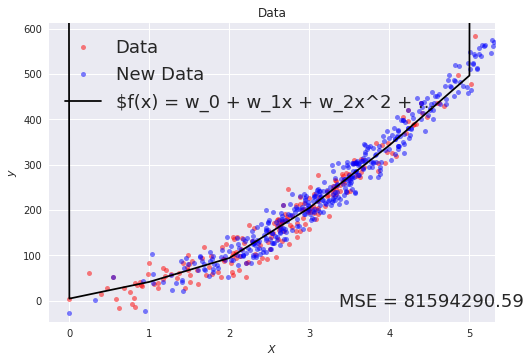

In [22]:
fig, ax_1 = plt.subplots()
ax_1.plot(X,y,'r.',markersize=10,alpha=0.5,label='Data')
ax_1.plot(nX,ny,'b.',markersize=10,alpha=0.5,label='New Data')
ax_1.plot(pred_X,pred_3,'k',label=r'$f(x) = w_0 + w_1x + w_2x^2 + ...')
ax_1.text(0.65,0.05,r'MSE = {:.2f}'.format(mse3[0][0]),transform=ax_1.transAxes,fontsize=18)

ax_1.set_xlabel(r'$X$')
ax_1.set_ylabel(r'$y$')
ax_1.set_title('Data')
ax_1.set_xlim(ax.get_xlim())
ax_1.set_ylim(ax.get_ylim())
ax_1.legend(fontsize=18)
plt.savefig('../figures//high_variance_fit_new.png')
plt.show()